In [1]:
from pandas import *
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data=read_csv('transport.csv')

In [3]:
headers=['time','gender','age','government','prob_coins','evaluation','num_use_trans','fav_payment','appli_sur','most_trans']

In [4]:
data.columns=headers
data.head()

,time,gender,age,government,prob_coins,evaluation,num_use_trans,fav_payment,appli_sur,most_trans
0,2021/03/23 2:07:58 م غرينتش+2,M,2,Dameitta,yes,2,2,cash,yes,Microbus
1,2021/03/23 3:47:49 م غرينتش+2,F,1,Dameitta,yes,3,4,cash,yes,Microbus
2,2021/03/23 3:48:15 م غرينتش+2,M,2,Dameitta,yes,3,2,cash,yes,Microbus
3,2021/03/23 3:49:01 م غرينتش+2,M,2,Dakahila,yes,3,2,cash,yes,Microbus
4,2021/03/23 3:49:06 م غرينتش+2,M,2,Dakahila,yes,3,2,cash,yes,Microbus


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   time           561 non-null    object
 1   gender         561 non-null    object
 2   age            561 non-null    int64 
 3   government     561 non-null    object
 4   prob_coins     561 non-null    object
 5   evaluation     561 non-null    int64 
 6   num_use_trans  561 non-null    int64 
 7   fav_payment    561 non-null    object
 8   appli_sur      561 non-null    object
 9   most_trans     561 non-null    object
dtypes: int64(3), object(7)
memory usage: 28.6+ KB


In [6]:
def count(ax):
    total=float(len(data))
    for i in ax.patches:
        height=i.get_height()
        ax.text(i.get_x()+i.get_width()/2,height+2,'{:.0f}%'.format((height*100)/total),ha='center',weight='bold')

#                      

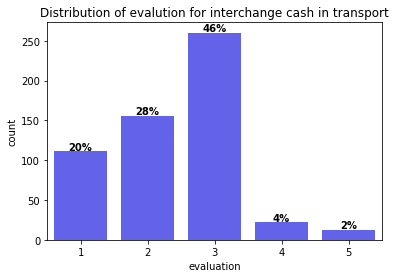

In [7]:
ax = sns.countplot(data=data, x='evaluation', color = '#4d4dff')
plt.title('Distribution of evalution for interchange cash in transport')
count(ax)

#               

Text(0.5, 1.0, 'Distribution of Governments')

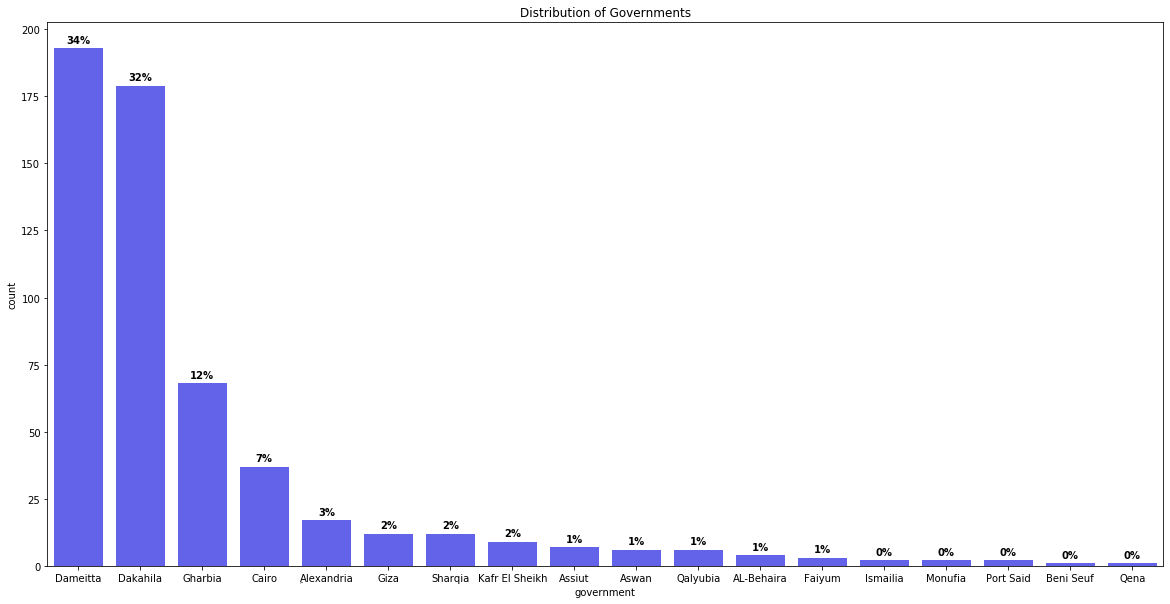

In [8]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='government',data=data, color = '#4d4dff', order = data['government'].value_counts().index)
count(ax)
plt.title('Distribution of Governments')

#       

In [9]:
data['age_str']=NAN

In [10]:
for i in [data]:
    i.loc[ i['age']==1,'age_str']='15-18'
    i.loc[ i['age']==2,'age_str']='19-23'
    i.loc[ i['age']==3,'age_str']='24-30'
    i.loc[ i['age']==4,'age_str']='31-45'
    i.loc[ i['age']==5,'age_str']='> 45'

Text(0.5, 1.0, 'Distribution of Ages')

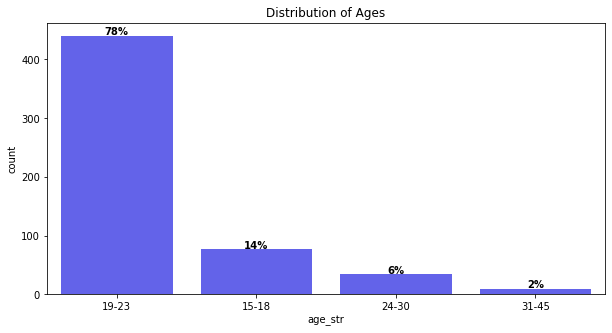

In [11]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='age_str',data=data, color = '#4d4dff', order = data['age_str'].value_counts().index)
count(ax)
plt.title('Distribution of Ages')

#       

In [12]:
data['eval_str']=NaN

In [13]:
for i in [data]:
    i.loc[ i['evaluation']==1,'eval_str']='very bad'
    i.loc[ i['evaluation']==2,'eval_str']='bad'
    i.loc[ i['evaluation']==3,'eval_str']='fine'
    i.loc[ i['evaluation']==4,'eval_str']='good'
    i.loc[ i['evaluation']==5,'eval_str']='very good'

C:\Users\habiba\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of evalution for interchange cash in transport')

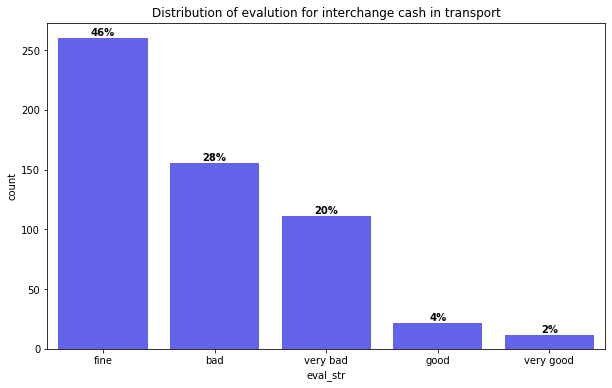

In [14]:
plt.figure(figsize=(10,6))
ax=sns.countplot('eval_str',data=data, color = '#4d4dff', order = data['eval_str'].value_counts().index)
count(ax)
plt.title('Distribution of evalution for interchange cash in transport')

#                             

Text(0.5, 1.0, 'Distribution of evalution for interchange cash in transport')

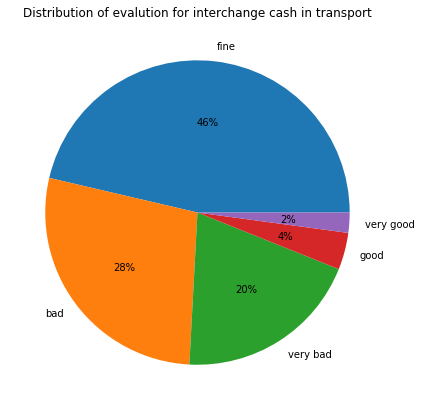

In [15]:
plt.figure(figsize=(10,7))
plt.pie(x=data['eval_str'].value_counts().values,labels=['fine', 'bad', 'very bad', 'good', 'very good'],autopct='%1.0f%%')
plt.title('Distribution of evalution for interchange cash in transport')

> Most people said that interchange cash in trasnport is fine although others said it is not fine at all and few people said it is good 
<br>
> If we foucs on diagram , we wil  found that people who said evaluation is bad and very bad is greater than who said it is fine 

#                          

In [16]:
data['prob_coins'].value_counts()

yes    489
no      72
Name: prob_coins, dtype: int64

Text(0.5, 1, 'Problem coins: yes, no')

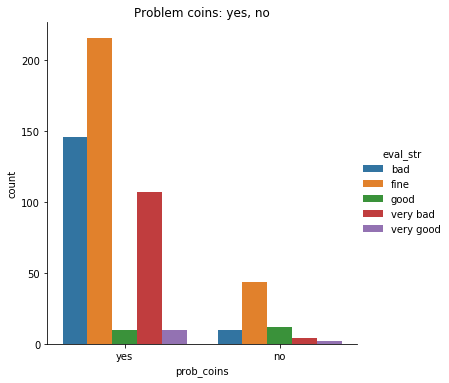

In [17]:
sns.catplot(x='prob_coins',hue='eval_str',data=data,kind='count')
plt.title('Problem coins: yes, no')

Text(0.5, 1, "How many people prefer Electroin payment and they face coins' problem")

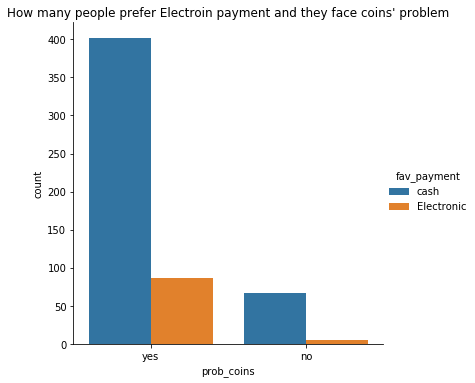

In [18]:
sns.catplot(x='prob_coins',hue='fav_payment',kind='count',data=data)
plt.title("How many people prefer Electroin payment and they face coins' problem")

#                             

#                                 

In [19]:
data['number_use_trans']=NaN

In [20]:
for i in [data]:
    i.loc[ i['num_use_trans']==1,'number_use_trans']='<2'
    i.loc[ i['num_use_trans']==2,'number_use_trans']='2 to 5 times'
    i.loc[ i['num_use_trans']==3,'number_use_trans']='5 to 10 times'
    i.loc[ i['num_use_trans']==4,'number_use_trans']='>10 times'

Text(0.5, 1.0, 'distribution of times for people who ride transports')

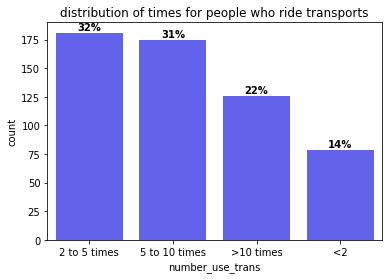

In [21]:
ax=sns.countplot(x='number_use_trans', data=data, color = '#4d4dff', order = data['number_use_trans'].value_counts().index)
count(ax)
plt.title('distribution of times for people who ride transports')

Text(0.5, 1.0, 'distribution of times for people who ride transports')

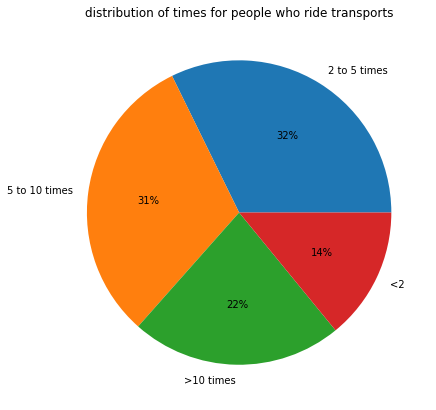

In [22]:
plt.figure(figsize=(10,7))
plt.pie(data['number_use_trans'].value_counts().values,labels=['2 to 5 times', '5 to 10 times', '>10 times', '<2'],autopct='%1.0f%%');
plt.title('distribution of times for people who ride transports')

#               

Text(0.5, 1, "Distribution of numbers of times people ride transport with coins' problem")

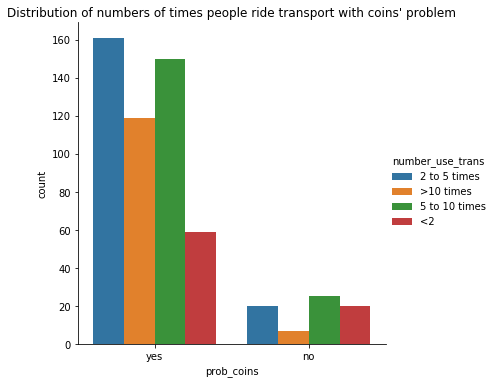

In [23]:
sns.catplot(hue='number_use_trans',x='prob_coins',data=data,kind='count')
plt.title("Distribution of numbers of times people ride transport with coins' problem")

#       

Text(0.5, 1.0, 'How many people prefer to electronic payment in transport ?')

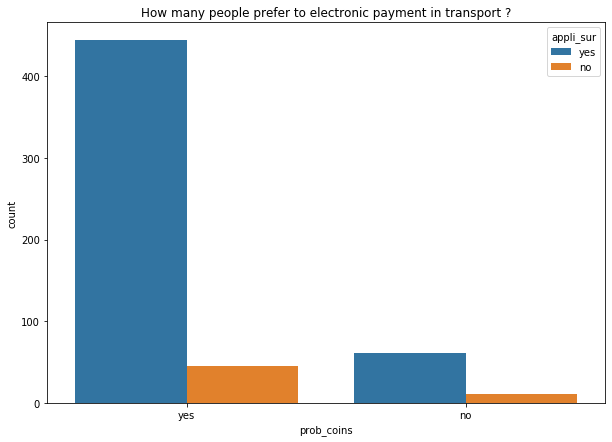

In [24]:
plt.figure(figsize=(10,7))
sns.countplot(hue='appli_sur',x='prob_coins',data=data)
plt.title('How many people prefer to electronic payment in transport ?')

###     

Text(0.5, 1.0, "Compare between people who face coins' problem with number of times they use transport and their opinions")

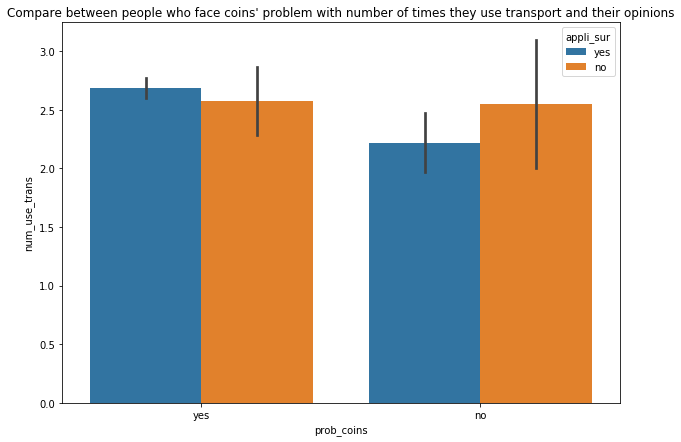

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(data=data,x='prob_coins',y='num_use_trans',hue='appli_sur')
plt.title("Compare between people who face coins' problem with number of times they use transport and their opinions")

#    

Text(0.5, 1.0, "Distribution of evaluatio with coins' problem and prefer electroinic payment in transport")

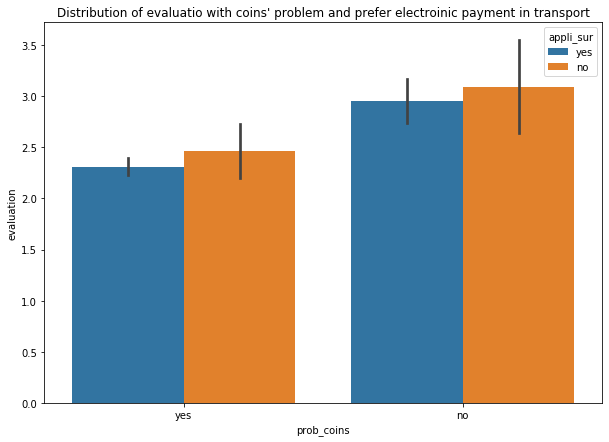

In [26]:
plt.figure(figsize=(10,7))
sns.barplot(x='prob_coins',hue='appli_sur',y='evaluation',data=data)
plt.title("Distribution of evaluatio with coins' problem and prefer electroinic payment in transport")

#         

<font color='brown'><h1 align= 'center'>Dameitta</h1></font>

In [27]:
prob=data[(data['government']=='Dameitta') & (data['prob_coins']=='yes')]
no_prob=data[(data['government']=='Dameitta') & (data['prob_coins']=='no')]

Text(0.5, 1.0, 'How many people face this problem in Damietta ?')

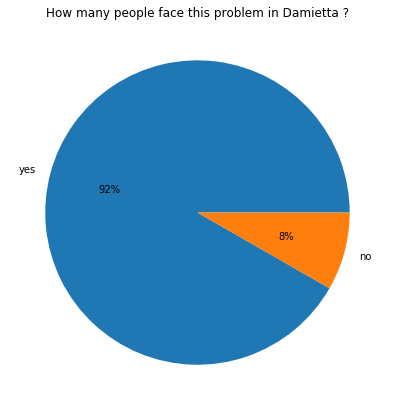

In [28]:
plt.figure(figsize=(10,7))
plt.pie(x=[len(prob),len(no_prob)],autopct='%1.0f%%',labels=['yes','no']);
plt.title('How many people face this problem in Damietta ?')

#     

Text(0.5, 1.0, "The ages of people in Damitta who do not face coins' problem")

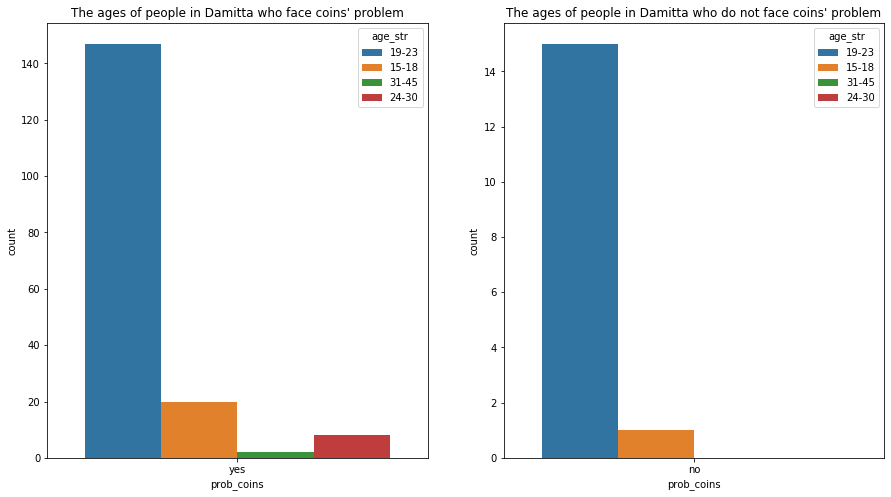

In [29]:
f=plt.figure(figsize=(15,8))
ax=f.add_subplot(121)
sns.countplot(x=prob['prob_coins'],hue='age_str',data=data,ax=ax)
ax.set_title("The ages of people in Damitta who face coins' problem")

ax=f.add_subplot(122)
sns.countplot(x=no_prob['prob_coins'],hue='age_str',data=data,ax=ax)
ax.set_title("The ages of people in Damitta who do not face coins' problem")

#         

<font color='brown'><h1 align= 'center'>Dakahila</h1></font>

In [30]:
prob=data[(data['government']=='Dakahila') & (data['prob_coins']=='yes')]
no_prob=data[(data['government']=='Dakahila') & (data['prob_coins']=='no')]

Text(0.5, 1.0, 'How many people face this problem in Dakahila ?')

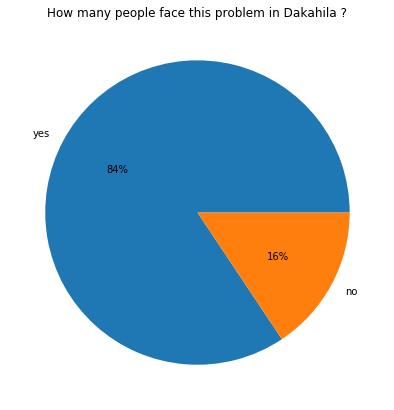

In [31]:
plt.figure(figsize=(10,7))
plt.pie(x=[len(prob),len(no_prob)],autopct='%1.0f%%',labels=['yes','no']);
plt.title('How many people face this problem in Dakahila ?')

#  

#          

Text(0.5, 1.0, "The ages of people in Dakahila who do not face coins' problem")

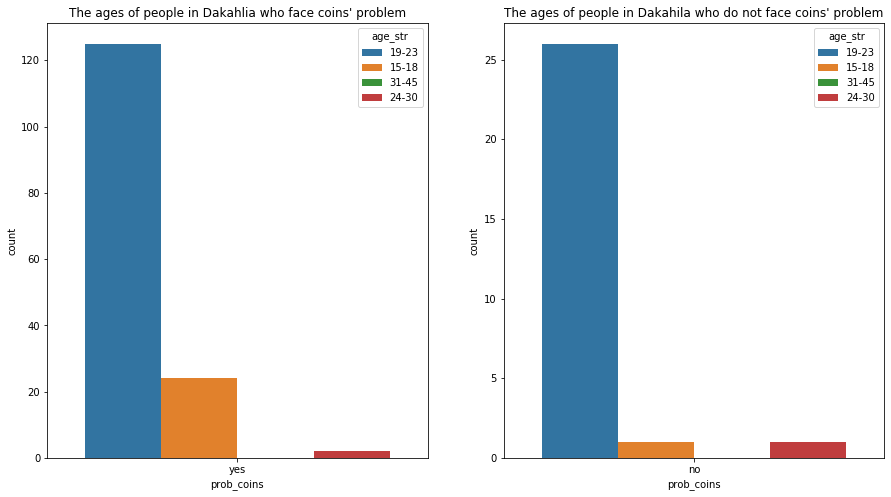

In [32]:
f=plt.figure(figsize=(15,8))
ax=f.add_subplot(121)
sns.countplot(x=prob['prob_coins'],hue='age_str',data=data,ax=ax)
ax.set_title("The ages of people in Dakahlia who face coins' problem")

ax=f.add_subplot(122)
sns.countplot(x=no_prob['prob_coins'],hue='age_str',data=data,ax=ax)
ax.set_title("The ages of people in Dakahila who do not face coins' problem")

#          

#      

C:\Users\habiba\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of evalution for interchange cash in transport')

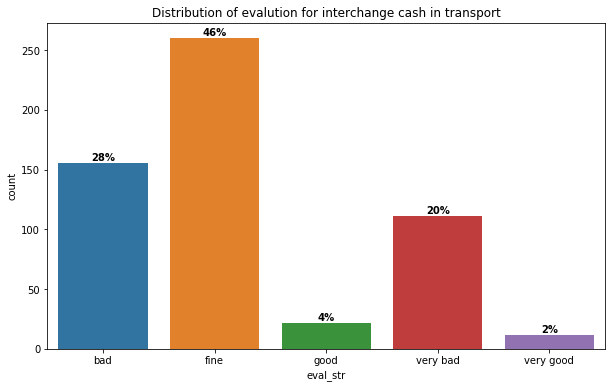

In [33]:
plt.figure(figsize=(10,6))
ax=sns.countplot('eval_str',data=data)
total=float(len(data))
for i in ax.patches:
    height=i.get_height()
    ax.text(i.get_x()+i.get_width()/2,height+2,'{:.0f}%'.format((height/total)*100),ha='center',weight='bold')

plt.title('Distribution of evalution for interchange cash in transport')


### Final Report:  
> - Most people found problem coins in the transports and also people who evaluated good and very good for currency exchange, they confirmed that they found problem coins in the transports.
- Most people evaluated bad and very bad for problem coins according with people who evaluated good.
- Most people used the transports from 2 to 10 times on a week.
- When we asked people: if we provided easy and security way to pay for transports, do you use it?. We find a lot of people agree, also who said they didn't find the problem coins.